In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import requests
import plotly
import pandas
import plotly as py
from pandas.io.json import json_normalize
print("\nExample Python Programming with BigStream Storage API")

# Define BigStream Storage API
bs_url = "http://demo.bs.igridproject.info/api/storage/"
storage_name = "demo.weather.pathum"


# Get last 100 record from stroage
full_url = bs_url+storage_name+"/objects?last=288"
res = requests.get(full_url)
data = json_normalize(res.json())



Example Python Programming with BigStream Storage API


In [6]:
data

,_id,meta._jid,meta._tid,meta._ts,meta.site,data.temp,data.hum,data.pressure,data.wind_speed,data.wind_deg,data.ts
0,3031306400004e895da5fb10,demo.weather.pathum,TR1571158800728a6067d,1571158801,pathum,27.37,88,1012,1.000,30.0,1571158200
1,3031306400004e8a5da5fc3d,demo.weather.pathum,TR1571159100895082a37,1571159101,pathum,27.51,88,1012,1.000,30.0,1571158806
2,3031306400004e8b5da5fe95,demo.weather.pathum,TR15711597011591711a7,1571159701,pathum,27.60,78,1012,2.100,20.0,1571159700
3,3031306400004e8c5da60219,demo.weather.pathum,TR1571160600718b43431,1571160601,pathum,27.61,78,1012,2.100,20.0,1571160600
4,3031306400004e8d5da6059d,demo.weather.pathum,TR1571161500889cfef74,1571161501,pathum,27.40,83,1012,3.592,14.0,1571161500
...,...,...,...,...,...,...,...,...,...,...,...
283,3031306400004fa45da82feb,demo.weather.pathum,TR157130340309975cb82,1571303403,pathum,32.75,55,1009,5.100,90.0,1571303403
284,3031306400004fa55da83240,demo.weather.pathum,TR15713040008398cfa3c,1571304001,pathum,32.75,55,1009,5.100,90.0,1571303701
285,3031306400004fa65da83499,demo.weather.pathum,TR157130460111070046d,1571304601,pathum,32.76,55,1009,4.600,90.0,1571304600
286,3031306400004fa75da835c4,demo.weather.pathum,TR1571304900834c1b59e,1571304901,pathum,32.77,55,1009,4.600,90.0,1571304301


In [95]:
data["ts"] = data["data.ts"]
data = data.drop(["meta._jid","meta._ts","meta._tid","_id","data.ts","data.wind_deg"],axis=1)
data["date"] = pandas.to_datetime(data['ts'],unit='s')
data["data.temp"] = pandas.to_numeric(data["data.temp"])


In [102]:
plt.style.use('ggplot')
data.describe()

,data.temp,data.hum,data.pressure,data.wind_speed,ts
count,288.000000,288.000000,288.000000,288.000000,2.880000e+02
mean,29.670764,73.979167,1011.388889,2.888865,1.571229e+09
std,2.486151,10.746019,1.296530,1.414249,4.271336e+04
min,25.910000,59.000000,1009.000000,0.500000,1.571155e+09
25%,27.380000,66.000000,1011.000000,2.100000,1.571191e+09
50%,29.260000,74.000000,1012.000000,2.600000,1.571229e+09
75%,32.147500,83.000000,1012.000000,4.100000,1.571266e+09
max,34.210000,94.000000,1014.000000,6.200000,1.571302e+09


Text(0, 0.5, 'humid (%)')

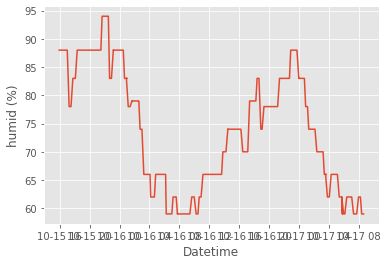

In [103]:
plt.plot(data.date,data["data.hum"])
plt.xlabel('Datetime')
plt.ylabel('humid (%)')

Text(0, 0.5, 'Temp (C)')

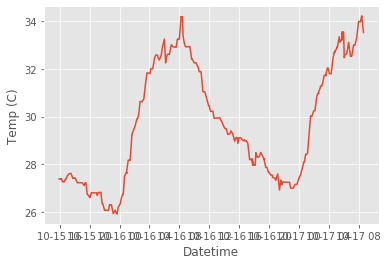

In [104]:
plt.plot(data.date,data["data.temp"])
plt.xlabel('Datetime')
plt.ylabel('Temp (C)')